In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
##checking the data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
##checking for all the null values
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

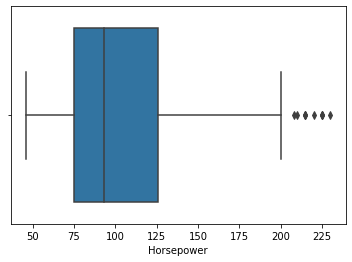

In [7]:
##summary statistics of quantitative variables
dataset.describe()
##looking at horsepower box plot
sns.boxplot(x=dataset['Horsepower'])

In [8]:
##imputing the values with median
median = dataset['Horsepower'].median()
dataset['Horsepower'] = dataset['Horsepower'].fillna(median)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
##category distribution
dataset["Cylinders"].value_counts() / len(dataset)


4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [10]:
dataset['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

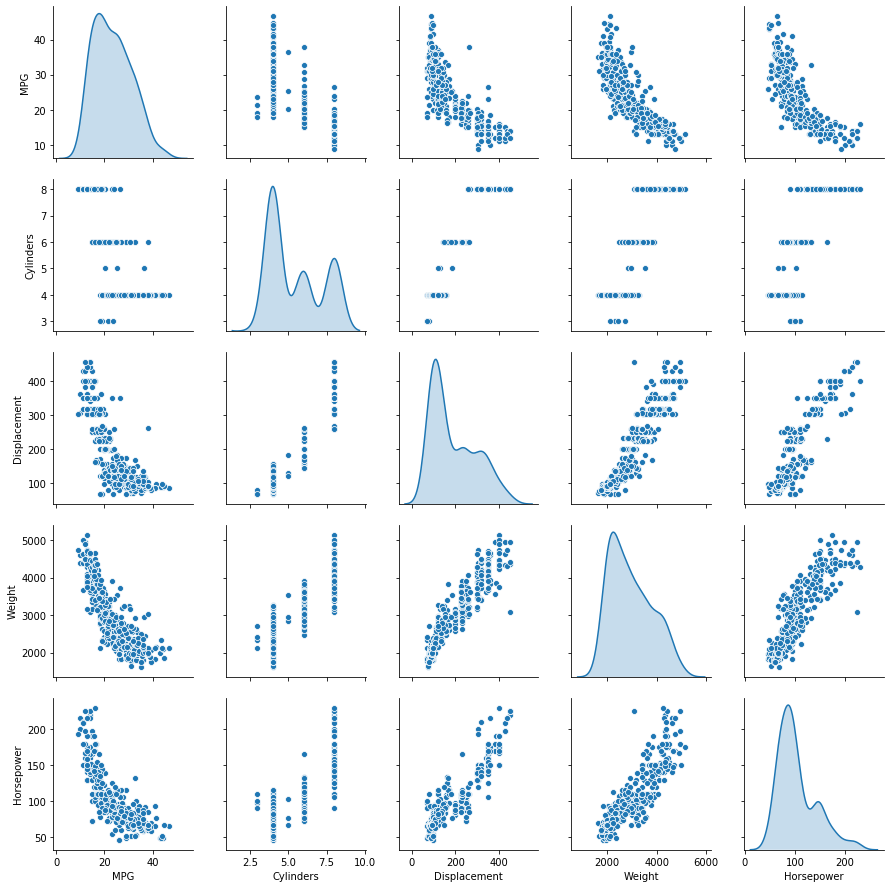

In [11]:
##pairplots to get an intuition of potential correlations
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")


In [12]:
from sklearn.model_selection import KFold

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["Cylinders"]):
    strat_train_set = dataset.loc[train_index]
    
    strat_test_set = dataset.loc[test_index]

In [14]:
##checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [15]:
##converting integer classes to countries in Origin column
strat_train_set['Origin'] = strat_train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
strat_train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
48,18.0,6,250.0,88.0,3139.0,14.5,71,India
84,27.0,4,97.0,88.0,2100.0,16.5,72,Germany
307,26.8,6,173.0,115.0,2700.0,12.9,79,India
311,32.1,4,98.0,70.0,2120.0,15.5,80,India
376,37.0,4,91.0,68.0,2025.0,18.2,82,Germany
117,29.0,4,68.0,49.0,1867.0,19.5,73,USA
277,16.2,6,163.0,133.0,3410.0,15.8,78,USA
148,26.0,4,116.0,75.0,2246.0,14.0,74,USA
194,22.5,6,232.0,90.0,3085.0,17.6,76,India
269,30.9,4,105.0,75.0,2230.0,14.5,78,India


In [16]:
strat_train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [17]:
dataset['displacement_on_power'] = dataset['Displacement'] / dataset['Horsepower']
dataset['weight_on_cylinder'] = dataset['Weight'] / dataset['Cylinders']
dataset['acceleration_on_power'] = dataset['Acceleration'] / dataset['Horsepower']
dataset['acceleration_on_cyl'] = dataset['Acceleration'] / dataset['Cylinders']
corr_matrix = dataset.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [18]:
##onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(dataset)
data_cat_1hot   # returns a sparse matrix
data_cat_1hot.toarray()[:5]

C:\Users\Debjani Khan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
##handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
regressor = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [20]:
strat_train_set.describe().transpose()[['mean', 'std']]


,mean,std
MPG,23.338050,7.679710
Cylinders,5.452830,1.698759
Displacement,192.408805,101.648135
Horsepower,103.710692,37.113960
Weight,2977.081761,832.293528
Acceleration,15.638679,2.768898
Model Year,75.996855,3.674019
Germany,0.188679,0.391870
India,0.622642,0.485490
USA,0.188679,0.391870


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [41]:
factors =  ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
X = pd.DataFrame(dataset[factors].copy())
y = dataset['MPG'].copy()

In [42]:
X = StandardScaler().fit_transform(X)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [44]:
regressor = LinearRegression()

In [45]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [46]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_predicted = regressor.predict(X_test)

In [48]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

2.091552603352172e-15